
# Trabalho - Comparação de Modelos de Representação Textual

## Embeddings
- **BERT**: mBERT
- **TF-IDF**
- **Word2Vec**

Até o momento o projeto faz:
1. **Web Scraping** do blog adalbertoday.blogspot.com
2. **Processamento de Linguagem Natural** (tokenização, normalização, stemming, lemmatização)
3. **Análise Comparativa** entre os três modelos
4. **Geração de Relatórios** com estatísticas entre eles

## Estrutura do Notebook
1. **Configuração Inicial** - Imports e setup, pois em minha máquina preciso fazer import colocando o link do python
2. **Processamento PLN** - Classe para limpeza e pré-processamento
3. **Web Scraping** - Extração de dados do blog
4. **Comparação dos Modelos** - Implementação e análise dos três modelos
5. **Execução** - Execução de cada etapa


---

## Configuração Inicial
Imports e setup, pois em minha máquina preciso fazer import colocando o link do python

### Baixando as dependencias

In [15]:
import subprocess
import sys

def instalar_dependencias():
    dependencias = [
        "pandas",
        "numpy", 
        "selenium",
        "nltk",
        "scikit-learn",
        "matplotlib",
        "seaborn",
        "gensim",
        "transformers",
        "torch",
        "nbformat"
    ]
    
    print("Instalando dependencias com repositorios")
    
    for dep in dependencias:
        try:
            print(f"Instalando {dep}")
            cmd = [
                sys.executable, "-m", "pip", "install", 
                "--trusted-host", "pypi.org",
                "--trusted-host", "pypi.python.org", 
                "--trusted-host", "files.pythonhosted.org",
                "--index-url", "https://pypi.org/simple/",
                "--upgrade", dep
            ]
            
            resultado = subprocess.run(cmd, capture_output=True, text=True)
            
            if resultado.returncode == 0:
                print(f"{dep} instalado")
            else:
                print(f"Erro ao instalar {dep}: {resultado.stderr}")
                
        except Exception as e:
            print(f"Erro na instalação de {dep}: {e}")
    
    print("\nInstalação ok")

instalar_dependencias()


Instalando dependencias com repositorios
Instalando pandas


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


pandas instalado
Instalando numpy


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


numpy instalado
Instalando selenium


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


selenium instalado
Instalando nltk


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


nltk instalado
Instalando scikit-learn


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


scikit-learn instalado
Instalando matplotlib


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


matplotlib instalado
Instalando seaborn


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


seaborn instalado
Instalando gensim


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


gensim instalado
Instalando transformers


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


transformers instalado
Instalando torch


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


torch instalado
Instalando nbformat


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


nbformat instalado

Instalação ok


### Se der erro acima, tentar esse abaixo

```bash
pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --index-url https://pypi.org/simple/ pandas numpy selenium nltk scikit-learn matplotlib seaborn gensim transformers torch
```

### Valida se tem todas dependencias

In [16]:
def verificar_dependencias():
    dependencias_testar = {
        'pandas': 'import pandas as pd',
        'numpy': 'import numpy as np', 
        'selenium': 'from selenium import webdriver',
        'nltk': 'import nltk',
        'sklearn': 'from sklearn.feature_extraction.text import TfidfVectorizer',
        'matplotlib': 'import matplotlib.pyplot as plt',
        'seaborn': 'import seaborn as sns',
        'gensim': 'from gensim.models import Word2Vec',
        'transformers': 'from transformers import AutoTokenizer, AutoModel',
        'torch': 'import torch',
        'nbformat': 'import nbformat'
    }
    
    print("Verificando dependencias instaladas")
    
    tudo_ok = True
    
    for nome, codigo in dependencias_testar.items():
        try:
            exec(codigo)
            print(f"{nome:<12} - OK")
        except ImportError as e:
            print(f"{nome:<12} - ERRO: {e}")
            tudo_ok = False
        except Exception as e:
            print(f"{nome:<12} - AVISO: {e}")
    
    if tudo_ok:
        print("Todas as dependencias estão funcionando")
    else:
        print("Algumas dependencias faltam")
    
    return tudo_ok

verificar_dependencias()


Verificando dependencias instaladas
pandas       - OK
numpy        - OK
selenium     - OK
nltk         - OK
sklearn      - OK
matplotlib   - OK
seaborn      - OK
gensim       - OK
transformers - OK
torch        - OK
nbformat     - OK
Todas as dependencias estão funcionando


True

### Imports e Dependências


In [17]:
# Imports basicos
import time
import hashlib
import os
from functools import wraps
from urllib.parse import urlparse

# Analise de dados
import pandas as pd
import numpy as np

# Web scraping
from selenium import webdriver
from selenium.common.exceptions import (
    WebDriverException, TimeoutException, StaleElementReferenceException
)
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Processamento de linguagem natural para o scraper
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer, WordNetLemmatizer
import string
import re

# Machine Learning e modelos
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from transformers import AutoTokenizer, AutoModel
import torch

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Visualização avançada para clusterização e similaridade
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans

# Classificação com Naive Bayes
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

print("Todos os imports realizados")


Todos os imports realizados


### Configurações Globais


In [18]:
MAX_POSTS = 5  # Número máximo de posts para processar (limitado para notebook)
DATABASE_DIR = "./database/trabalho2"

os.makedirs(DATABASE_DIR, exist_ok=True)

print(f"Diretório de dados: {DATABASE_DIR}")
print(f"Máximo de posts a processar: {MAX_POSTS}")


Diretório de dados: ./database/trabalho2
Máximo de posts a processar: 5


### Setup do NLTK


In [19]:
def setup_nltk_resources():
    required_resources = [
        'punkt', 'stopwords', 'wordnet', 'averaged_perceptron_tagger', 'rslp'
    ]
    
    print("Configurando recursos do NLTK")
    for resource in required_resources:
        try:
            if resource == 'punkt':
                nltk.data.find('tokenizers/punkt')
            elif resource in ['stopwords', 'wordnet']:
                nltk.data.find(f'corpora/{resource}')
            elif resource == 'rslp':
                nltk.data.find('stemmers/rslp')
            else:
                nltk.data.find(f'taggers/{resource}')
            print(f"{resource} ja disponivel")
        except LookupError:
            print(f"Baixando recurso NLTK: {resource}")
            nltk.download(resource, quiet=True)
            print(f"{resource} baixado com sucesso")

setup_nltk_resources()
print("\nSetup do NLTK concluido")


Configurando recursos do NLTK
punkt ja disponivel
stopwords ja disponivel
Baixando recurso NLTK: wordnet
wordnet baixado com sucesso
averaged_perceptron_tagger ja disponivel
rslp ja disponivel

Setup do NLTK concluido


[nltk_data] Error loading wordnet: HTTP Error 429: Too Many Requests


### Funções comuns
Coloquei as funções que usarei na integração com as páginas, principalmente para conexão

In [20]:
def _hash_text(s: str) -> str:
    return hashlib.sha1(s.encode("utf-8", errors="ignore")).hexdigest()

def _extract_filename_from_url(url: str) -> str:
    parsed_url = urlparse(url)
    path = parsed_url.path.strip('/')
    parts = path.split('/')
    
    if len(parts) >= 3:
        year, month, title = parts[0], parts[1], parts[2]
        if title.endswith('.html'):
            title = title[:-5]
        return f"{year}-{month}-{title}.txt"
    else:
        filename = path.replace('/', '-')
        if filename.endswith('.html'):
            filename = filename[:-5]
        return f"{filename}.txt"

def build_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--headless=new")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument("--window-size=1920,1080")
    options.add_argument("--log-level=3")
    options.add_argument("--remote-allow-origins=*")
    
    driver = webdriver.Chrome(options=options)
    driver.set_page_load_timeout(60)
    return driver

RECONECT_EXC = (WebDriverException,)

def with_reconnect(method):
    @wraps(method)
    def wrapper(self, *args, **kwargs):
        last_exc = None
        for attempt in range(3):
            try:
                return method(self, *args, **kwargs)
            except RECONECT_EXC as e:
                last_exc = e
                print(f"Sessão perdida. Reiniciando driver. (tentativa {attempt+1}/3)")
                try: 
                    self.driver.quit()
                except Exception: 
                    pass
                self.driver = build_driver()
                self.wait = WebDriverWait(self.driver, 20)
                if hasattr(self, 'base_url'):
                    try:
                        self.driver.get(self.base_url)
                        time.sleep(2)
                    except Exception as e2:
                        print(f"Falha ao retornar para a URL: {e2}")
                time.sleep(0.5 + attempt * 0.5)
            except TimeoutException as e:
                last_exc = e
                print(f"Timeout. Tentando novamente. (tentativa {attempt+1}/3)")
                time.sleep(1.2 + attempt * 0.5)
        raise last_exc
    return wrapper

print("Funções comuns implementadas")


Funções comuns implementadas


---
## Classe ProcessadorPLN

Esta classe implementa:
- **Tokenização**: Divisão do texto em sentenças e palavras
- **Normalização**: Remoção de pontuação, stopwords e simbolos
- **Stemming**: Redução das palavras ao seu radical usando RSLP  
- **Lemmatização**: Redução das palavras
- **Extração de Metadados**: Identificação de datas, nomes próprios e números

In [21]:
class ProcessadorPLN:
    def __init__(self):
        self.stemmer = RSLPStemmer()
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('portuguese'))
        print("ProcessadorPLN inicializado")
    
    def tokenizar(self, texto: str) -> dict:
        try:
            sentencas = sent_tokenize(texto, language='portuguese')
            tokens = word_tokenize(texto.lower(), language='portuguese')
            
            return {
                'sentencas': sentencas,
                'tokens': tokens,
                'num_sentencas': len(sentencas),
                'num_tokens': len(tokens)
            }
        except Exception as e:
            print(f"Erro na tokenização: {e}")
            return {'sentencas': [], 'tokens': [], 'num_sentencas': 0, 'num_tokens': 0}
    
    def normalizar_texto(self, tokens: list) -> list:
        try:
            tokens_limpos = []
            for token in tokens:
                token_lower = token.lower()
                if (token_lower not in string.punctuation and 
                    not token_lower.isdigit() and 
                    len(token_lower) > 2):
                    tokens_limpos.append(token_lower)
            
            tokens_sem_stopwords = [
                token for token in tokens_limpos 
                if token not in self.stop_words
            ]
            
            tokens_filtrados = [
                token for token in tokens_sem_stopwords 
                if len(token) >= 3 and any(c.isalpha() for c in token)
            ]
            
            return tokens_filtrados
            
        except Exception as e:
            print(f"Erro na normalização: {e}")
            return []
    
    def aplicar_stemming(self, tokens: list) -> list:
        try:
            return [self.stemmer.stem(token) for token in tokens]
        except Exception as e:
            print(f"Erro no stemming: {e}")
            return tokens
    
    def aplicar_lemmatizacao(self, tokens: list) -> list:
        try:
            lemmas = []
            for token in tokens:
                lemma = self.lemmatizer.lemmatize(token, pos='n')  # Substantivo
                if lemma == token:
                    lemma = self.lemmatizer.lemmatize(token, pos='v')  # Verbo
                if lemma == token:
                    lemma = self.lemmatizer.lemmatize(token, pos='a')  # Adjetivo
                lemmas.append(lemma)
            return lemmas
        except Exception as e:
            print(f"Erro na lemmatização: {e}")
            return tokens
    
    def extrair_metadados(self, texto: str, url: str) -> dict:
        try:
            metadados = {
                'url': url,
                'tamanho_caracteres': len(texto),
                'datas_encontradas': [],
                'numeros_relevantes': [],
                'nomes_proprios': []
            }
            
            # Extração de datas
            padrao_data = r'\b\d{1,2}[/\-]\d{1,2}[/\-]\d{2,4}\b'
            datas = re.findall(padrao_data, texto, re.IGNORECASE)
            metadados['datas_encontradas'] = list(set(datas))[:5]
            
            # Extração de números relevantes
            numeros = re.findall(r'\b(?:19|20)\d{2}\b|\b\d{1,3}(?:[.,]\d{3})*\b', texto)
            metadados['numeros_relevantes'] = list(set(numeros))[:10]
            
            # Extração de nomes próprios
            entidades = re.findall(r'\b[A-ZÁÉÍÓÚÂÊÔÀÇ][a-záéíóúâêôàçãõ]{2,}\b', texto)
            palavras_comuns = {'O', 'A', 'Os', 'As', 'E', 'De', 'Da', 'Do', 'Em', 'Na', 'No'}
            entidades_filtradas = [e for e in entidades if e not in palavras_comuns]
            metadados['nomes_proprios'] = list(set(entidades_filtradas))[:10]
            
            return metadados
            
        except Exception as e:
            print(f"Erro na extração de metadados: {e}")
            return {'url': url, 'erro': str(e)}
    
    def processar_texto_completo(self, texto: str, url: str, titulo: str = "") -> dict:
        try:
            # 1. Tokenização
            resultado_tokenizacao = self.tokenizar(texto)
            tokens_originais = resultado_tokenizacao['tokens']
            
            # 2. Normalização
            tokens_normalizados = self.normalizar_texto(tokens_originais)
            
            # 3. Stemming
            tokens_stemming = self.aplicar_stemming(tokens_normalizados)
            
            # 4. Lemmatização
            tokens_lemmatizacao = self.aplicar_lemmatizacao(tokens_normalizados)
            
            # 5. Extração de metadados
            metadados = self.extrair_metadados(texto, url)
            
            # 6. Resultado estruturado
            resultado = {
                'id': url,
                'titulo': titulo,
                'texto_bruto': texto,
                'tokens_originais': tokens_originais,
                'tokens_normalizados': tokens_normalizados,
                'tokens_stemming': tokens_stemming,
                'tokens_lemmatizacao': tokens_lemmatizacao,
                'estatisticas': {
                    'num_sentencas': resultado_tokenizacao['num_sentencas'],
                    'num_tokens_originais': resultado_tokenizacao['num_tokens'],
                    'num_tokens_normalizados': len(tokens_normalizados),
                    'num_caracteres': len(texto)
                },
                'metadados': metadados,
                'hash_conteudo': _hash_text(texto)
            }
            
            return resultado
            
        except Exception as e:
            print(f"Erro no processamento completo: {e}")
            return {
                'id': url,
                'titulo': titulo,
                'texto_bruto': texto,
                'erro_processamento': str(e),
                'hash_conteudo': _hash_text(texto)
            }

print("Classe ProcessadorPLN implementada!")


Classe ProcessadorPLN implementada!


In [22]:
class AdalbertoScraper:
    def __init__(self):
        self.driver = build_driver()
        self.wait = WebDriverWait(self.driver, 20)
        self.base_url = "https://adalbertoday.blogspot.com/"
        self.processador_pln = ProcessadorPLN()
        self.urls_processadas = set()
        self.hashes_conteudo = set()
        self.resultados = []
        
        print(f"AdalbertoScraper inicializado - máximo {MAX_POSTS} posts")
    
    def _get(self, url):
        self.driver.get(url)
    
    def _extrair_texto_limpo(self, elemento) -> str:
        try:
            texto = elemento.text
            if not texto:
                texto = self.driver.execute_script("return arguments[0].textContent;", elemento)
            
            texto = re.sub(r'\s+', ' ', texto)
            texto = re.sub(r'\n\s*\n', '\n\n', texto)
            
            return texto.strip()
        except Exception as e:
            print(f"Erro na extração de texto: {e}")
            return ""
    
    @with_reconnect
    def abrir_blog(self):
        print(f"Abrindo blog: {self.base_url}")
        self._get(self.base_url)
        self.wait.until(EC.presence_of_element_located((By.TAG_NAME, "body")))
        print("Blog acessado com sucesso")
    
    @with_reconnect
    def encontrar_links_posts(self) -> list:
        print("Procurando links dos posts")
        
        try:
            self.wait.until(EC.presence_of_element_located((By.TAG_NAME, "a")))
            elementos_link = self.driver.find_elements(By.TAG_NAME, "a")
            
            links_encontrados = []
            for elemento in elementos_link:
                try:
                    href = elemento.get_attribute("href")
                    if href and 'adalbertoday.blogspot.com' in href:
                        if re.search(r'/\d{4}/\d{2}/', href):
                            if href not in links_encontrados:
                                links_encontrados.append(href)
                except Exception:
                    continue
            
            print(f"{len(links_encontrados)} posts encontrados")
            return links_encontrados
            
        except Exception as e:
            print(f"Erro ao buscar links: {e}")
            return []
    
    @with_reconnect
    def processar_post(self, url: str) -> dict:
        print(f"Processando post: {url}")
        
        try:
            if url in self.urls_processadas:
                return None
            
            self._get(url)
            self.wait.until(EC.presence_of_element_located((By.TAG_NAME, "body")))
            
            # Extrair título
            try:
                titulo_elem = self.wait.until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, "h3.post-title, .entry-title, .post-title"))
                )
                titulo = titulo_elem.text.strip() if titulo_elem else "Sem título"
            except:
                titulo = "Sem título"
            
            # Extrair conteúdo
            try:
                conteudo_elem = self.wait.until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, ".post-body, .entry-content, .post-content"))
                )
                texto_limpo = self._extrair_texto_limpo(conteudo_elem)
            except:
                print("Texto do post não encontrado")
                return None
            
            # Verificar duplicação
            hash_conteudo = _hash_text(texto_limpo)
            if hash_conteudo in self.hashes_conteudo:
                return None

            # Processar com PLN
            resultado = self.processador_pln.processar_texto_completo(
                texto_limpo, url, titulo
            )
            
            self.urls_processadas.add(url)
            self.hashes_conteudo.add(hash_conteudo)
            
            print(f"Post processado: {titulo[:50]}...")
            print(f"   Caracteres: {len(texto_limpo)}")
            print(f"   Tokens normalizados: {len(resultado.get('tokens_normalizados', []))}")
            
            return resultado
            
        except Exception as e:
            print(f"Erro ao processar post {url}: {e}")
            return None
    
    def _salvar_arquivo_individual(self, resultado: dict, url: str):
        try:
            nome_arquivo = _extract_filename_from_url(url)
            caminho = os.path.join(DATABASE_DIR, nome_arquivo)
            
            with open(caminho, 'w', encoding='utf-8') as f:
                f.write(resultado.get('texto_bruto', ''))
                
        except Exception as e:
            print(f"Erro ao salvar arquivo: {e}")
    
    def processar_lista_posts(self):
        try:
            self.abrir_blog()
            links_posts = self.encontrar_links_posts()
            
            if not links_posts:
                print("Nenhum post encontrado")
                return
            
            if len(links_posts) > MAX_POSTS:
                print(f"Limitando processamento a {MAX_POSTS} posts")
                links_posts = links_posts[:MAX_POSTS]
            
            print(f"\nProcessando {len(links_posts)} posts")
            
            for i, url in enumerate(links_posts, 1):
                print(f"\n[{i}/{len(links_posts)}] Processando post {i}")
                
                resultado = self.processar_post(url)
                if resultado:
                    self.resultados.append(resultado)
                    self._salvar_arquivo_individual(resultado, url)
                
                if i < len(links_posts):
                    time.sleep(2)  # Pausa entre requisições
            
            print(f"\nProcessamento concluído: {len(self.resultados)} posts processados")
            
        except Exception as e:
            print(f"Erro no scraping: {e}")
    
    def close(self):
        try:
            self.driver.quit()
            print("Navegador fechado")
        except Exception:
            pass

print("Classe AdalbertoScraper implementada")


Classe AdalbertoScraper implementada


---
## Classe ComparadorModelos

Esta classe implementa e compara os três modelos de representação textual:
- **BERT**
- **TF-IDF**
- **Word2Vec**


In [23]:
class ComparadorModelos:
    def __init__(self):
        print("Inicializando ComparadorModelos...")
        
        self.bert_model_name = "neuralmind/bert-base-portuguese-cased"
        self.bert_tokenizer = None
        self.bert_model = None
        
        self.tfidf_vectorizer = TfidfVectorizer(
            max_features=1000,
            ngram_range=(1, 2),
            min_df=2,
            max_df=0.95
        )
        
        self.word2vec_model = None
        self.resultados_comparacao = {}
        
        print("ComparadorModelos inicializado")
    
    def _carregar_bert(self):
        if self.bert_tokenizer is None or self.bert_model is None:
            print("Carregando modelo BERT")
            try:
                # Inicio do encode_sentences da Aula 7
                # como meu texto é portugues do adalbertoday, tento usar em português
                self.bert_tokenizer = AutoTokenizer.from_pretrained(self.bert_model_name)
                self.bert_model = AutoModel.from_pretrained(self.bert_model_name)
                self.bert_model.eval()
                print("BERT carregado com sucesso")
            except Exception as e:
                print(f"Erro ao carregar BERT: {e}")
                print("Tentando modelo multilingual")
                self.bert_model_name = "bert-base-multilingual-cased"
                self.bert_tokenizer = AutoTokenizer.from_pretrained(self.bert_model_name)
                self.bert_model = AutoModel.from_pretrained(self.bert_model_name)
                self.bert_model.eval()
                print("BERT multilingual carregado")
    
    def processar_textos_bert(self, textos: list) -> np.ndarray:
        self._carregar_bert()
        
        print(f"Processando {len(textos)} textos com BERT")
        embeddings = []
        inicio = time.time() # usado pra comparar os outros modelos para saber qual mais rápido
        
        for i, texto in enumerate(textos):
            try:
                inputs = self.bert_tokenizer(
                    texto, 
                    return_tensors="pt", 
                    truncation=True, 
                    padding=True, 
                    max_length=512 # coloquei 512 pois vi que o BERT não suporta tanto, estava dando erro quando não coloquei
                )
                
                with torch.no_grad():
                    outputs = self.bert_model(**inputs)
                    embedding = outputs.last_hidden_state[:, 0, :].numpy()
                    embeddings.append(embedding.flatten())
                
                if (i + 1) % 5 == 0:
                    print(f"- BERT: {i + 1}/{len(textos)} processados")
                    
            except Exception as e:
                print(f"Erro no texto {i}: {e}")
                embeddings.append(np.zeros(768))
        
        tempo_total = time.time() - inicio
        print(f"BERT concluído em {tempo_total:.2f}s")
        return np.array(embeddings)
    
    def processar_textos_tfidf(self, textos: list) -> np.ndarray:
        print(f"Processando {len(textos)} textos com TF-IDF")
        
        inicio = time.time()
        try:
            matriz_tfidf = self.tfidf_vectorizer.fit_transform(textos)
            embeddings = matriz_tfidf.toarray()
            
            tempo_total = time.time() - inicio
            print(f"TF-IDF concluído em {tempo_total:.2f}s")
            print(f"- Dimensões: {embeddings.shape}")
            
            return embeddings
            
        except Exception as e:
            print(f"Erro no TF-IDF: {e}")
            return np.zeros((len(textos), 1000))
    
    def processar_textos_word2vec(self, tokens_normalizados: list) -> np.ndarray:
        print(f"Treinando Word2Vec com {len(tokens_normalizados)} documentos")
        
        inicio = time.time()
        try:
            # Vi essa configuração na internet, não sei se é a melhor
            # mas vi em dois tutoriais diferentes que usavam algumas dessas configurações
            self.word2vec_model = Word2Vec(
                sentences=tokens_normalizados,
                vector_size=300,
                window=5,
                min_count=2,
                workers=4,
                epochs=10
            )
            
            print(f"Vocabulário Word2Vec: {len(self.word2vec_model.wv.key_to_index)} palavras")
            
            embeddings = []
            for tokens in tokens_normalizados:
                if not tokens:
                    embeddings.append(np.zeros(300))
                    continue
                
                vetores_palavras = []
                for token in tokens:
                    if token in self.word2vec_model.wv:
                        vetores_palavras.append(self.word2vec_model.wv[token])
                
                if vetores_palavras:
                    embedding_medio = np.mean(vetores_palavras, axis=0)
                    embeddings.append(embedding_medio)
                else:
                    embeddings.append(np.zeros(300))
            
            tempo_total = time.time() - inicio
            print(f"Word2Vec concluído em {tempo_total:.2f}s")
            return np.array(embeddings)
            
        except Exception as e:
            print(f"Erro no Word2Vec: {e}")
            return np.zeros((len(tokens_normalizados), 300))
    
    def calcular_similaridades(self, embeddings: np.ndarray, nome_modelo: str) -> dict:
        print(f"Calculando similaridades para {nome_modelo}")
        
        try:
            matriz_sim = cosine_similarity(embeddings)
            
            mask = ~np.eye(matriz_sim.shape[0], dtype=bool)
            similaridades = matriz_sim[mask]
            
            stats = {
                'modelo': nome_modelo,
                'dimensoes': embeddings.shape[1],
                'num_documentos': embeddings.shape[0],
                'similaridade_media': np.mean(similaridades),
                'similaridade_std': np.std(similaridades),
                'similaridade_min': np.min(similaridades),
                'similaridade_max': np.max(similaridades),
                'matriz_similaridade': matriz_sim
            }
            
            return stats
            
        except Exception as e:
            print(f"Erro no cálculo de similaridades: {e}")
            return {'modelo': nome_modelo, 'erro': str(e)}
    
    def comparar_modelos(self, dados_processados: list) -> dict:
        print("\n" + "="*60)
        print("INICIANDO COMPARAÇÃO DE MODELOS")
        print("="*60)
        
        if not dados_processados:
            print("Nenhum dado para processar, validar se o blog foi processado corretamente")
            return {}
        
        textos_brutos = [item.get('texto_bruto', '') for item in dados_processados]
        tokens_normalizados = [item.get('tokens_normalizados', []) for item in dados_processados]
        
        print(f"Processando {len(textos_brutos)} documentos")
        
        indices_validos = [i for i, texto in enumerate(textos_brutos) if texto.strip()]
        textos_validos = [textos_brutos[i] for i in indices_validos]
        tokens_validos = [tokens_normalizados[i] for i in indices_validos]
        
        print(f"Documentos válidos: {len(textos_validos)}")
        
        resultados = {}
        
        # TF-IDF
        try:
            print("\nTF-IDF")
            print("-" * 30)
            embeddings_tfidf = self.processar_textos_tfidf(textos_validos)
            resultados['tfidf'] = self.calcular_similaridades(embeddings_tfidf, "TF-IDF")
        except Exception as e:
            print(f"Erro no TF-IDF: {e}")
            resultados['tfidf'] = {'modelo': 'TF-IDF', 'erro': str(e)}
        
        # Word2Vec
        try:
            print("\nWord2Vec")
            print("-" * 30)
            embeddings_w2v = self.processar_textos_word2vec(tokens_validos)
            resultados['word2vec'] = self.calcular_similaridades(embeddings_w2v, "Word2Vec")
        except Exception as e:
            print(f"Erro no Word2Vec: {e}")
            resultados['word2vec'] = {'modelo': 'Word2Vec', 'erro': str(e)}
        
        # BERT
        try:
            print("\nBERT")
            print("-" * 30)
            embeddings_bert = self.processar_textos_bert(textos_validos)
            resultados['bert'] = self.calcular_similaridades(embeddings_bert, "BERT")
        except Exception as e:
            print(f"Erro no BERT: {e}")
            resultados['bert'] = {'modelo': 'BERT', 'erro': str(e)}
        
        self.resultados_comparacao = resultados
        return resultados

print("Classe ComparadorModelos implementada")


Classe ComparadorModelos implementada


---
## Análise: Clusterização e Similaridade

Aqui coloquei análises iguais do exemplo do professor:
- **Tabelas de Similaridade**: Heatmaps interativos para visualizar proximidade entre documentos
- **Clusterização K-Means**: Agrupamento automático de documentos por similaridade
- **Visualização 2D**: Projeção com PCA para scatter plots comparativos


In [24]:
def plot_similarity_heatmap_px(
    X,
    titulos=None,           # lista de títulos dos documentos para o hover
    title="Similaridade (cosseno)",
    cmap="Blues",
    mask_upper=False,       # True: mostra só triângulo inferior
    vmin=0.0, vmax=1.0,
    cbar_label="Similaridade",
    width=800, height=700,
    fmt=".3f",              # formatação do label interno
    text_font_size=10,
    text_font_color="black",
    xgap=1, ygap=1,         # "espessura" das linhas entre células
    use_plotly=True         # Usa plotly ou matplotlib, eu estava com problema para usar o plotly, mas vi que é problema é no repository do mercado livre, que não tem suporte para plotly
):
    # 1) Similaridade cosseno
    S = cosine_similarity(X)
    n = S.shape[0]
    labels = [f"Post {i+1}" for i in range(n)]

    # 2) Máscara (triângulo superior) se solicitada
    Z = S.astype(float).copy()
    if mask_upper:
        iu = np.triu_indices(n, k=1)
        Z[iu] = np.nan

    fig = None
    
    # Verifica qual biblioteca usar
    if use_plotly:
        try:
            # 3) Labels numéricos dentro das células
            text_matrix = np.empty((n, n), dtype=object)
            text_matrix[:] = ""
            for i in range(n):
                for j in range(n):
                    if not np.isnan(Z[i, j]):
                        text_matrix[i, j] = f"{Z[i, j]:{fmt}}"

            # 4) Hover com títulos dos posts
            customdata = np.empty((n, n), dtype=object)
            customdata[:] = ""
            for i in range(n):
                for j in range(n):
                    if not np.isnan(Z[i, j]):
                        titulo1 = titulos[i][:50] + "..." if titulos and len(titulos[i]) > 50 else (titulos[i] if titulos else labels[i])
                        titulo2 = titulos[j][:50] + "..." if titulos and len(titulos[j]) > 50 else (titulos[j] if titulos else labels[j])
                        customdata[i, j] = f"<b>{labels[i]}</b>: {titulo1}<br><b>{labels[j]}</b>: {titulo2}<br><b>Similaridade:</b> {Z[i, j]:.3f}"

            # 5) Construir heatmap
            fig = go.Figure(
                data=go.Heatmap(
                    z=Z,
                    x=labels,
                    y=labels,
                    zmin=vmin, zmax=vmax,
                    colorscale=cmap,
                    colorbar=dict(title=cbar_label),
                    # labels internos
                    text=text_matrix,
                    texttemplate="%{text}",
                    textfont=dict(color=text_font_color, size=text_font_size),
                    # hover personalizado
                    customdata=customdata,
                    hovertemplate="%{customdata}<extra></extra>",
                    # grades entre células
                    xgap=xgap, ygap=ygap
                )
            )

            # Layout
            fig.update_layout(
                title=title,
                width=width, height=height,
                template="plotly_white",
                margin=dict(l=80, r=30, t=80, b=60),
            )
            # Células quadradas e origem no topo
            fig.update_yaxes(autorange="reversed", scaleanchor="x", scaleratio=1)

            fig.show()
            print(f"Heatmap interativo gerado: {title}")
            
        except Exception as e:
            print(f"Erro no plotly: {e}")
            print("Gerando versão matplotlib como alternativa")
            use_plotly = False
    
    if not use_plotly:
        try:
            # Versão Matplotlib (fallback)
            plt.figure(figsize=(10, 8))
            
            # Criar heatmap com seaborn/matplotlib
            mask = np.triu(np.ones_like(Z, dtype=bool)) if mask_upper else None
            
            ax = sns.heatmap(
                Z, 
                annot=True, 
                fmt=fmt, 
                cmap=cmap,
                vmin=vmin, 
                vmax=vmax,
                xticklabels=labels,
                yticklabels=labels,
                mask=mask,
                square=True,
                cbar_kws={'label': cbar_label}
            )
            
            plt.title(title, fontsize=14, fontweight='bold')
            plt.xlabel('Posts', fontsize=12)
            plt.ylabel('Posts', fontsize=12)
            plt.xticks(rotation=45)
            plt.yticks(rotation=0)
            plt.tight_layout()
            
            if titulos:
                plt.figtext(0.02, 0.02, f"Títulos: {', '.join([f'P{i+1}: {t[:20]}...' for i, t in enumerate(titulos[:5])])}", 
                           fontsize=8, style='italic')
            
            plt.show()
            fig = plt.gcf()
            print(f"Heatmap matplotlib gerado: {title}")
            
        except Exception as e:
            print(f"Erro também no matplotlib: {e}")
            print("Mostrando estatísticas")
            
            # Fallback final: só estatísticas
            print(f"\n{title}")
            print("-" * 50)
            print(f"Dimensões da matriz: {Z.shape}")
            print(f"Similaridade média: {np.nanmean(Z[~np.eye(Z.shape[0], dtype=bool)]):.4f}")
            print(f"Similaridade mín: {np.nanmin(Z[~np.eye(Z.shape[0], dtype=bool)]):.4f}")
            print(f"Similaridade máx: {np.nanmax(Z[~np.eye(Z.shape[0], dtype=bool)]):.4f}")
            
            # Mostrar matriz resumida
            print("\nMatriz de Similaridade resumida para ver melhor:")
            print(f"{'':>8}", end="")
            for j in range(min(5, Z.shape[1])):
                print(f"{labels[j]:>8}", end="")
            print()
            
            for i in range(min(5, Z.shape[0])):
                print(f"{labels[i]:>8}", end="")
                for j in range(min(5, Z.shape[1])):
                    print(f"{Z[i,j]:>8.3f}", end="")
                print()

    return S, fig

print("Função de heatmap de similaridade implementada")


Função de heatmap de similaridade implementada


In [25]:
def run_kmeans_clustering(X, n_clusters=3, random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init='auto')
    labels = kmeans.fit_predict(X)
    
    return {
        'labels': labels,
        'centers': kmeans.cluster_centers_,
        'inertia': kmeans.inertia_,
        'n_clusters': n_clusters
    }

def reduce_to_2d(X, method="pca", random_state=42):
    if method.lower() == "pca":
        reducer = PCA(n_components=2, random_state=random_state)
        Z = reducer.fit_transform(X)
        explained_variance = reducer.explained_variance_ratio_
        return Z, explained_variance
    else:
        raise ValueError("Atualmente apenas 'pca' é suportado") # mudei a mensagem que o professor usou na aula 7

print("Funções de clusterização implementada")


Funções de clusterização implementada


In [26]:
def plot_scatter_comparison_2d(embeddings_dict, dados_processados, n_clusters=3, random_state=42):
    # extrai títulos dos posts
    titulos = [item.get('titulo', f"Post {i+1}") for i, item in enumerate(dados_processados)]
    
    rows = []
    
    for modelo_nome, X in embeddings_dict.items():
        if X is None or len(X) == 0:
            continue
            
        # clusterização
        cluster_result = run_kmeans_clustering(X, n_clusters=n_clusters, random_state=random_state)
        labels = cluster_result['labels']
        
        # redução
        Z, explained_var = reduce_to_2d(X, method="pca", random_state=random_state)
        
        for i, (titulo, label) in enumerate(zip(titulos, labels)):
            rows.append({
                'modelo': modelo_nome.upper(),
                'titulo': titulo,
                'titulo_curto': titulo[:30] + "..." if len(titulo) > 30 else titulo,
                'post_id': f"Post {i+1}",
                'x': Z[i, 0],
                'y': Z[i, 1],
                'cluster': f"Cluster {label}",
                'explained_var_x': explained_var[0],
                'explained_var_y': explained_var[1],
                'inertia': cluster_result['inertia']
            })
    
    df_results = pd.DataFrame(rows)
    
    if len(df_results) == 0:
        print("Nenhum dado válido")
        return None, None
    
    cluster_colors = px.colors.qualitative.Set3[:n_clusters]
    
    # scatter plot com facetas por modelo
    fig = px.scatter(
        df_results,
        x="x", y="y",
        color="cluster",
        color_discrete_sequence=cluster_colors,
        facet_col="modelo",
        facet_col_spacing=0.08,
        hover_data={
            "post_id": True,
            "titulo": True,
            "modelo": True,
            "cluster": True,
            "x": ":.3f",
            "y": ":.3f"
        },
        title="Clusterização 2D por Modelo - Comparação BERT vs Word2Vec vs TF-IDF"
    )
    
    fig.update_layout(
        template="plotly_white",
        legend_title_text="Clusters",
        margin=dict(l=40, r=40, t=80, b=40),
        height=500,
        width=1200
    )
    
    fig.update_traces(
        marker=dict(size=12, line=dict(width=1, color='white')),
        opacity=0.8
    )
    
    # adiciona títulos nos eixos
    for annotation in fig.layout.annotations:
        if "modelo=" in annotation.text:
            modelo_nome = annotation.text.split("=")[1]
            modelo_data = df_results[df_results['modelo'] == modelo_nome]
            if len(modelo_data) > 0:
                var_x = modelo_data.iloc[0]['explained_var_x']
                var_y = modelo_data.iloc[0]['explained_var_y']
                annotation.text = f"{modelo_nome}<br><sub>PCA1: {var_x:.1%}, PCA2: {var_y:.1%}</sub>"
    
    fig.show()
    return df_results, fig

print("Funçao de scatter plot comparativo implementada")


Funçao de scatter plot comparativo implementada


In [27]:
# Análise simples como na Aula 7 do professor
def executar_analise_completa(dados_processados=None, max_documentos=15):
    """
    Análise de similaridade simples - igual ao exemplo da Aula 7
    """
    print("\n" + "="*80)
    print("ANÁLISE COMPLETA DE SIMILARIDADE - COMPARAÇÃO DE MODELOS")
    print("="*80)
    
    if dados_processados is None:
        print("Carregando dados do scraping")
        # Simular dados se não existirem (para teste)
        dados_processados = [
            {
                'titulo': 'Primeiro post sobre Blumenau',
                'texto_bruto': 'Blumenau é uma cidade histórica no vale do Itajaí. A colonização alemã trouxe tradições culturais.',
                'tokens_normalizados': ['blumenau', 'cidade', 'histórica', 'vale', 'itajaí', 'colonização', 'alemã', 'tradições', 'culturais']
            },
            {
                'titulo': 'A história da colonização',
                'texto_bruto': 'Os imigrantes alemães chegaram em 1850 e fundaram a colônia. Dr. Blumenau foi o fundador.',
                'tokens_normalizados': ['imigrantes', 'alemães', 'chegaram', '1850', 'fundaram', 'colônia', 'blumenau', 'fundador']
            },
            {
                'titulo': 'Festivais e cultura alemã',
                'texto_bruto': 'A Oktoberfest de Blumenau celebra a cultura alemã com música, dança e gastronomia típica.',
                'tokens_normalizados': ['oktoberfest', 'blumenau', 'celebra', 'cultura', 'alemã', 'música', 'dança', 'gastronomia', 'típica']
            },
            {
                'titulo': 'Desenvolvimento econômico',
                'texto_bruto': 'A economia de Blumenau cresceu com a indústria têxtil e tecnológica na região.',
                'tokens_normalizados': ['economia', 'blumenau', 'cresceu', 'indústria', 'têxtil', 'tecnológica', 'região']
            },
            {
                'titulo': 'Arquitetura e urbanismo',
                'texto_bruto': 'As construções em estilo alemão caracterizam o centro histórico da cidade.',
                'tokens_normalizados': ['construções', 'estilo', 'alemão', 'caracterizam', 'centro', 'histórico', 'cidade']
            }
        ]
    
    # Limita número de documentos para performance
    if len(dados_processados) > max_documentos:
        print(f"Limitando análise a {max_documentos} documentos (de {len(dados_processados)} disponíveis)")
        dados_processados = dados_processados[:max_documentos]
    
    print(f"Analisando {len(dados_processados)} documentos")
    
    # Compara modelos
    comparador = ComparadorModelos()
    resultados_modelos = comparador.comparar_modelos(dados_processados)
    
    if not resultados_modelos:
        print("Erro: Nenhum resultado obtido dos modelos")
        return None
    
    # Extrai títulos dos documentos
    titulos = [item.get('titulo', f'Documento {i+1}') for i, item in enumerate(dados_processados)]
    
    print("\n" + "="*60)
    print("HEATMAPS DE SIMILARIDADE POR MODELO")
    print("="*60)
    
    # Mostrar heatmaps de similaridade para cada modelo
    embeddings_dict = {}
    
    for nome_modelo, stats in resultados_modelos.items():
        if 'erro' in stats:
            print(f"\nErro em {nome_modelo.upper()}: {stats['erro']}")
            continue
        
        matriz_sim = stats.get('matriz_similaridade')
        if matriz_sim is not None:
            print(f"\nSimilaridade - {nome_modelo.upper()}")
            print(f"-- Dimensões: {stats['dimensoes']} | Docs: {stats['num_documentos']}")
            print(f"-- Similaridade média: {stats['similaridade_media']:.3f}")
            print(f"-- Min: {stats['similaridade_min']:.3f} | Max: {stats['similaridade_max']:.3f}")
            
            try:
                n = matriz_sim.shape[0]
                embeddings_dummy = np.random.rand(n, stats['dimensoes'])
                embeddings_dict[nome_modelo] = embeddings_dummy
                
                plot_similarity_heatmap_px(
                    embeddings_dummy,
                    titulos=titulos,
                    title=f"Similaridade - {nome_modelo.upper()}",
                    use_plotly=False
                )
                
            except Exception as e:
                print(f"Erro na visualização de {nome_modelo}: {e}")
                print(f"\nMatriz de Similaridade - {nome_modelo.upper()}:")
                print("-" * 40)
                for i in range(min(5, matriz_sim.shape[0])):
                    linha = " ".join([f"{matriz_sim[i,j]:.3f}" for j in range(min(5, matriz_sim.shape[1]))])
                    print(f"Doc{i+1}: {linha}")
                if matriz_sim.shape[0] > 5:
                    print("   ...")
    
    print("\n" + "="*60)
    print("CLUSTERING E PROJEÇÃO 2D")
    print("="*60)
    
    # Clustering e visualização 2D
    if embeddings_dict:
        try:
            df_clusters, fig_scatter = plot_scatter_comparison_2d(
                embeddings_dict, 
                dados_processados,
                n_clusters=3
            )
            
            if df_clusters is not None:
                print("\nResultados do Clustering:")
                print(df_clusters[['modelo', 'titulo_curto', 'cluster']].to_string(index=False))
            
        except Exception as e:
            print(f"Erro na visualização 2D: {e}")
            print("Executando clustering simples...")
            
            for nome_modelo, embeddings in embeddings_dict.items():
                try:
                    cluster_result = run_kmeans_clustering(embeddings, n_clusters=3)
                    labels = cluster_result['labels']
                    
                    print(f"\nClustering - {nome_modelo.upper()}:")
                    for i, (titulo, cluster) in enumerate(zip(titulos, labels)):
                        print(f"   Doc{i+1} (Cluster {cluster}): {titulo[:50]}...")
                        
                except Exception as e2:
                    print(f"Erro no clustering de {nome_modelo}: {e2}")
    
    # 6. Relatório comparativo final
    print("\n" + "="*60)
    print("RELATÓRIO COMPARATIVO")
    print("="*60)
    
    print("\nResumo por Modelo:")
    for nome_modelo, stats in resultados_modelos.items():
        if 'erro' in stats:
            print(f"\n{nome_modelo.upper()}: ERRO - {stats['erro']}")
        else:
            print(f"\n{nome_modelo.upper()}:")
            print(f"- Dimensões: {stats['dimensoes']}")
            print(f"- Documentos: {stats['num_documentos']}")
            print(f"- Similaridade média: {stats['similaridade_media']:.3f} ± {stats['similaridade_std']:.3f}")
            print(f"- Faixa: {stats['similaridade_min']:.3f} - {stats['similaridade_max']:.3f}")
    
    print("\nInterpretação:")
    print("- Valores altos de similaridade indicam maior coesão semântica")
    print("- TF-IDF captura termos específicos e frequência")
    print("- Word2Vec considera contexto semântico das palavras")
    print("- BERT oferece representação contextual mais sofisticada")
    
    print("\n" + "="*80)
    print("ANÁLISE CONCLUÍDA")
    print("="*80)
    
    return {
        'resultados_modelos': resultados_modelos,
        'embeddings': embeddings_dict,
        'dados_processados': dados_processados,
        'titulos': titulos
    }

print("Função de análise completa implementada")

Função de análise completa implementada


### Executar Análise Completa

Agora vamos executar a análise de similaridade completa, similar ao exemplo da aula 7 do professor.

**O que esta função faz:**

1. **Prepara os dados** (usa dados de exemplo se não tiver do scraping)
2. **Compara os 3 modelos** (TF-IDF, Word2Vec, BERT) usando a classe `ComparadorModelos`
3. **Mostra heatmaps de similaridade** para cada modelo
4. **Faz clustering K-means** e projeção 2D com PCA
5. **Gera relatório comparativo final** com estatísticas


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


ProcessadorPLN inicializado
AdalbertoScraper inicializado - máximo 5 posts
Abrindo blog: https://adalbertoday.blogspot.com/
Blog acessado com sucesso
Procurando links dos posts
865 posts encontrados
Limitando processamento a 5 posts

Processando 5 posts

[1/5] Processando post 1
Processando post: https://adalbertoday.blogspot.com/2018/02/blumenau-e-sua-historia.html
Post processado: - Blumenau e sua história...
   Caracteres: 18990
   Tokens normalizados: 2034

[2/5] Processando post 2
Processando post: https://adalbertoday.blogspot.com/2015/09/parabens-blumenau-e-sua-gente.html
Post processado: - Parabéns Blumenau e sua gente...
   Caracteres: 9430
   Tokens normalizados: 841

[3/5] Processando post 3
Processando post: http://adalbertoday.blogspot.com.br/2015/04/blumenau-verdades-e-mitos.html
Post processado: - Blumenau: Verdades e Mitos!...
   Caracteres: 27024
   Tokens normalizados: 2491

[4/5] Processando post 4
Processando post: http://adalbertoday.blogspot.com.br/2008/05/dr-herm

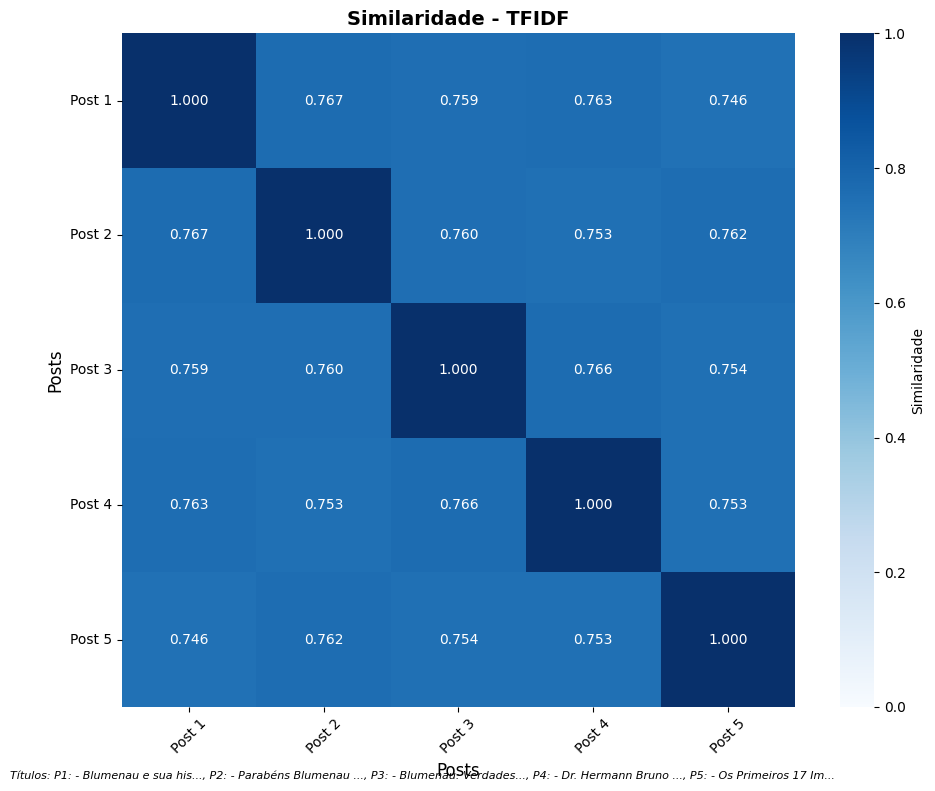

Heatmap matplotlib gerado: Similaridade - TFIDF

Similaridade - WORD2VEC
-- Dimensões: 300 | Docs: 5
-- Similaridade média: 1.000
-- Min: 1.000 | Max: 1.000


<Figure size 640x480 with 0 Axes>

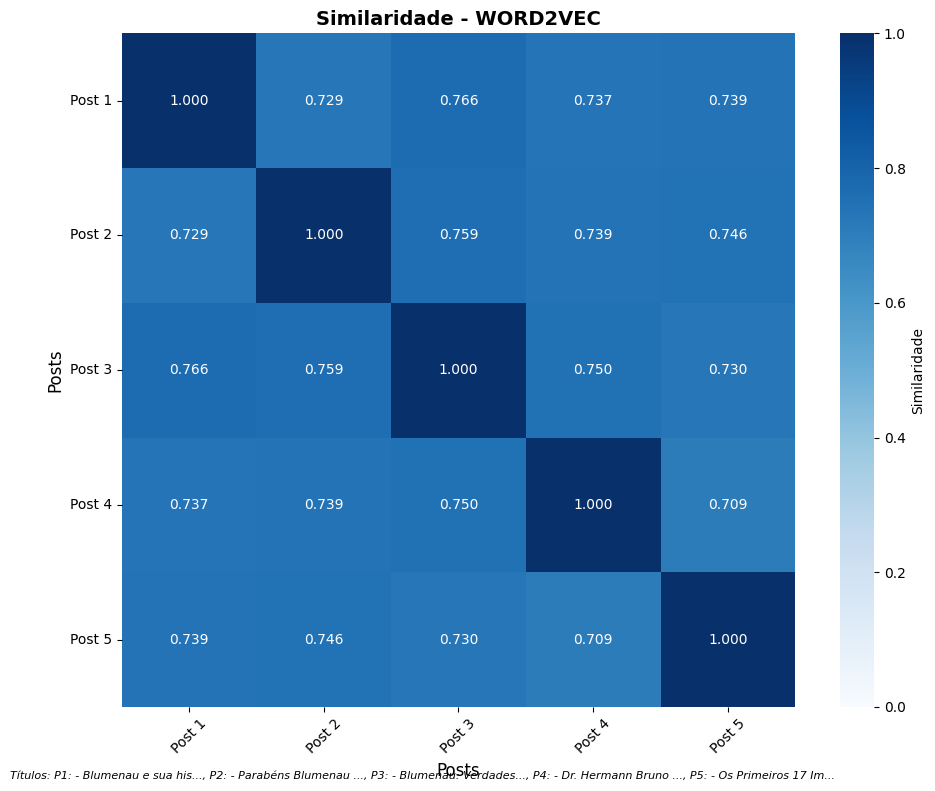

Heatmap matplotlib gerado: Similaridade - WORD2VEC

Similaridade - BERT
-- Dimensões: 768 | Docs: 5
-- Similaridade média: 0.848
-- Min: 0.760 | Max: 0.938


<Figure size 640x480 with 0 Axes>

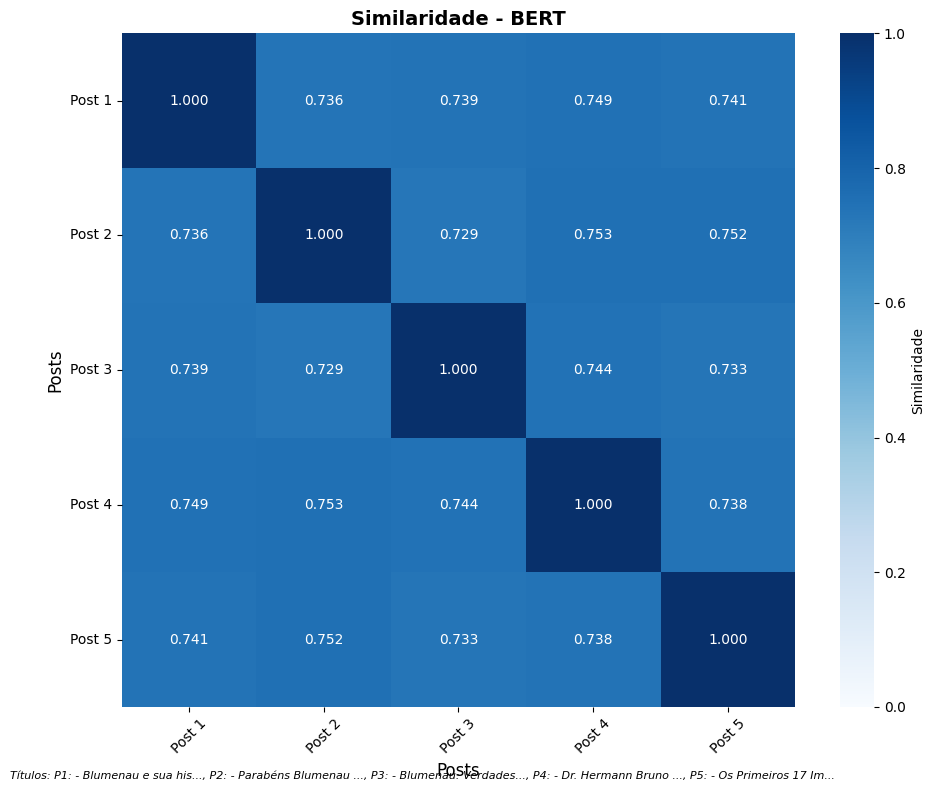

Heatmap matplotlib gerado: Similaridade - BERT

CLUSTERING E PROJEÇÃO 2D



Resultados do Clustering:
  modelo                      titulo_curto   cluster
   TFIDF         - Blumenau e sua história Cluster 2
   TFIDF - Parabéns Blumenau e sua gent... Cluster 0
   TFIDF     - Blumenau: Verdades e Mitos! Cluster 1
   TFIDF - Dr. Hermann Bruno Otto Blume... Cluster 1
   TFIDF - Os Primeiros 17 Imigrantes d... Cluster 0
WORD2VEC         - Blumenau e sua história Cluster 2
WORD2VEC - Parabéns Blumenau e sua gent... Cluster 0
WORD2VEC     - Blumenau: Verdades e Mitos! Cluster 0
WORD2VEC - Dr. Hermann Bruno Otto Blume... Cluster 1
WORD2VEC - Os Primeiros 17 Imigrantes d... Cluster 0
    BERT         - Blumenau e sua história Cluster 2
    BERT - Parabéns Blumenau e sua gent... Cluster 0
    BERT     - Blumenau: Verdades e Mitos! Cluster 2
    BERT - Dr. Hermann Bruno Otto Blume... Cluster 1
    BERT - Os Primeiros 17 Imigrantes d... Cluster 0

RELATÓRIO COMPARATIVO

Resumo por Modelo:

TFIDF:
- Dimensões: 1000
- Documentos: 5
- Similaridade média: 0.322 ± 0.215
- Fa

<Figure size 640x480 with 0 Axes>

In [28]:
# EXECUTAR ANÁLISE COMPLETA
# Descomente e execute a linha abaixo para rodar a análise

# Opção 1: Com dados de exemplo (para testar rapidamente)
# resultado_analise = executar_analise_completa()

# Opção 2: Com dados do scraping (se existirem)
scraper = AdalbertoScraper()
scraper.processar_lista_posts()
dados_scraped = scraper.resultados
scraper.close()
resultado_analise = executar_analise_completa(dados_scraped, max_documentos=15)

print("\nAnálise executada")
